# Grand Mean (1+1)

In [8]:
#%matplotlib qt
%matplotlib inline
import mne
import numpy as np
import pandas as pd
import sklearn
import matplotlib

In [3]:
epochs_1 = mne.read_epochs('..\data_EEG\\1_filtered_epochs-epo.fif', preload=True)
raw_1 = mne.io.read_raw_fif('..\data_EEG\\1_cleaned_raw.fif', preload=True)
epochs__2 = mne.read_epochs('..\data_EEG\\2_filtered_epochs-epo.fif', preload=True)
raw__2 = mne.io.read_raw_fif('..\data_EEG\\2_cleaned_raw.fif', preload=True)
#updated_behav_2 = pd.read_csv('..\data_behavioral\\2_updated_behav.csv')


Reading c:\Users\Samuel\Desktop\CogNeuroExam\CogNeuroscienceExam\EEG\..\data_EEG\1_filtered_epochs-epo.fif ...
    Found the data of interest:
        t =    -200.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
286 matching events found
No baseline correction applied
0 projection items activated
Opening raw data file ..\data_EEG\1_cleaned_raw.fif...
    Range : 16309 ... 922331 =     16.309 ...   922.331 secs
Ready.
Reading 0 ... 906022  =      0.000 ...   906.022 secs...
Reading c:\Users\Samuel\Desktop\CogNeuroExam\CogNeuroscienceExam\EEG\..\data_EEG\2_filtered_epochs-epo.fif ...
    Found the data of interest:
        t =    -200.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
289 matching events found
No baseline correction applied
0 projection items activated
Opening raw data file ..\data_EEG\2_cleaned_raw.fif...
    Range : 8075000 ... 8982000 =   8075.000 ...  8982.000 secs
Ready.
Reading 0 ... 907000

In [6]:
### Concatenate Epochs
bad_channels = epochs__2.info['bads']
epochs__2 = epochs__2.drop_channels(bad_channels)

epochs_2 = mne.concatenate_epochs([epochs_1, epochs__2])


Not setting metadata
575 matching events found
Applying baseline correction (mode: mean)


C:\Users\Samuel\AppData\Local\Temp\ipykernel_5464\2675645090.py:5: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs_2 = mne.concatenate_epochs([epochs_1, epochs__2])


In [11]:
data = epochs_2.get_data(copy=True)

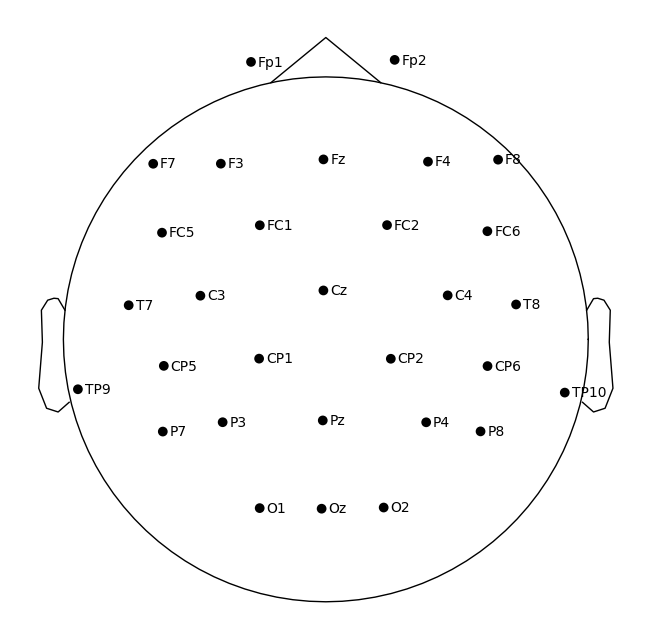

In [9]:
epochs_2.plot_sensors(show_names=True);
#epochs

In [10]:
Word = epochs_2["Word"]
Cue = epochs_2["Cue"]
Pred = epochs_2["Pred"]



Not setting metadata
192 matching events found
No baseline correction applied
0 projection items activated


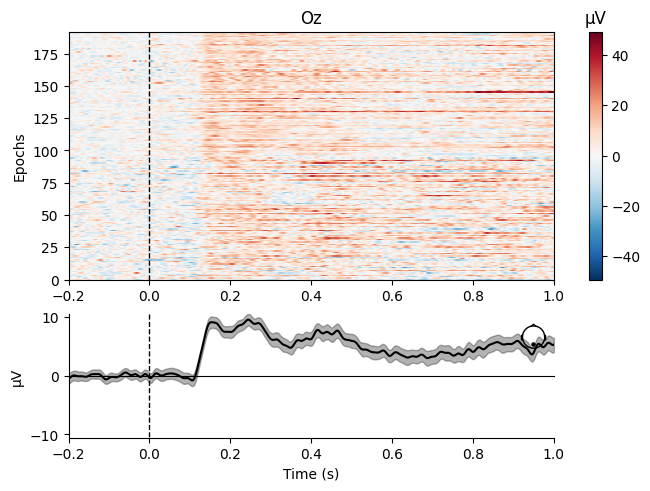

[<Figure size 640x480 with 4 Axes>]

In [20]:
Cue.plot_image(picks=["Oz"])

In [15]:
Word_Congruent = epochs_2["Word/Congruent"]
Word_Incongruent = epochs_2["Word/Incongruent"]

evoked_con = Word_Congruent.average()
evoked_incon = Word_Incongruent.average()

In [94]:
evoked_con

Condition,0.43 × Stable/Word/Tool/Congruent + 0.28 × Stable/Word/Animal/Congruent + 0.16 × Volatile/Word/Tool/Congruent + 0.13 × Volatile/Word/Animal/Congruent
Data kind,average
Timepoints,1201 samples
Channels,32 channels
Number of averaged epochs,61
Time range (secs),-0.2 – 1.0
Baseline (secs),-0.200 – 0.000 s


combining channels using "mean"
combining channels using "mean"


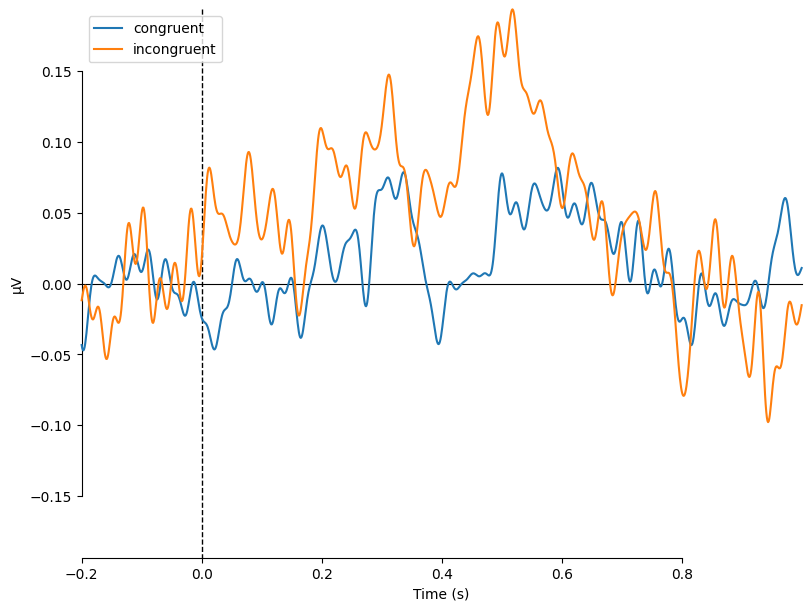

[<Figure size 800x600 with 1 Axes>]

In [17]:
mne.viz.plot_compare_evokeds({"congruent":evoked_con, "incongruent":evoked_incon}, combine="mean")

In [19]:
drop_log = epochs_2.drop_log
bad_epochs_indices = [i for i, log in enumerate(drop_log) if len(log) > 0]

print(bad_epochs_indices)

[1, 48, 149, 174, 203, 213, 247, 249, 280, 297]


In [18]:
epochs_2

Number of events,575
Events,Stable/Cue/Animal: 50Stable/Cue/Tool: 47Stable/Pred/Correct: 89Stable/Pred/Incorrect: 9Stable/Word/Animal/Congruent: 38Stable/Word/Animal/Incongruent: 3Stable/Word/Tool/Congruent: 47Stable/Word/Tool/Incongruent: 7Volatile/Cue/Animal: 49Volatile/Cue/Tool: 46Volatile/Pred/Correct: 77Volatile/Pred/Incorrect: 17Volatile/Word/Animal/Congruent: 24Volatile/Word/Animal/Incongruent: 33Volatile/Word/Tool/Congruent: 15Volatile/Word/Tool/Incongruent: 24
Time range,-0.200 – 1.000 s
Baseline,-0.200 – 0.000 s


In [122]:
original_event_id_2 = epochs_2.event_id


In [123]:
event_id_2 = {
    'Stable/Cue/Tool': 111, 
    'Stable/Cue/Animal': 112, 
    'Stable/Pred/Incorrect': 120, 
    'Stable/Pred/Correct': 121, 
    'Stable/Word/Tool/Congruent': 1311, 
    'Stable/Word/Animal/Incongruent': 1322,
    'Stable/Word/Animal/Congruent': 1321, 
    'Stable/Word/Tool/Incongruent': 1312, 
    'Volatile/Cue/Tool': 211, 
    'Volatile/Cue/Animal': 212, 
    'Volatile/Pred/Incorrect': 220, 
    'Volatile/Pred/Correct': 221, 
    'Volatile/Word/Tool/Congruent': 2311, 
    'Volatile/Word/Animal/Incongruent': 2322,
    'Volatile/Word/Animal/Congruent': 2321, 
    'Volatile/Word/Tool/Incongruent': 2312, 
}

In [ ]:
"""
events_2 = epochs_2.events
updated_events = events_2.copy()
num_stable_epochs = 149

# Function to map original event codes to stable/volatile codes
def map_event_code(event_code, epoch_index, num_stable_epochs):
    if event_code in original_event_id_2.values():
        key = list(original_event_id_2.keys())[list(original_event_id_2.values()).index(event_code)]
        if epoch_index < num_stable_epochs:
            return event_id_2[f'Stable/{key}']
        else:
            return event_id_2[f'Volatile/{key}']
    return event_code

# Update event codes
for i in range(len(events_2)):
    event_code = events_2[i, 2]
    updated_events[i, 2] = map_event_code(event_code, i, num_stable_epochs)
"""

In [87]:
#epochs_2.events = updated_events
#epochs_2.event_id = event_id_2

In [21]:
epochs_2

Number of events,575
Events,Stable/Cue/Animal: 50Stable/Cue/Tool: 47Stable/Pred/Correct: 89Stable/Pred/Incorrect: 9Stable/Word/Animal/Congruent: 38Stable/Word/Animal/Incongruent: 3Stable/Word/Tool/Congruent: 47Stable/Word/Tool/Incongruent: 7Volatile/Cue/Animal: 49Volatile/Cue/Tool: 46Volatile/Pred/Correct: 77Volatile/Pred/Incorrect: 17Volatile/Word/Animal/Congruent: 24Volatile/Word/Animal/Incongruent: 33Volatile/Word/Tool/Congruent: 15Volatile/Word/Tool/Incongruent: 24
Time range,-0.200 – 1.000 s
Baseline,-0.200 – 0.000 s


In [42]:
epochs_2.save('../data_EEG/group_epochs-epo.fif', overwrite=True)
raw_2.save('../data_EEG/group_cleaned_raw.fif', overwrite=True)

Writing c:\Users\Samuel\Desktop\CogNeuroExam\CogNeuroscienceExam\EEG\..\data_EEG\group_cleaned_raw.fif
Closing c:\Users\Samuel\Desktop\CogNeuroExam\CogNeuroscienceExam\EEG\..\data_EEG\group_cleaned_raw.fif
[done]


In [22]:
#events_2 = updated_events
events_2 = epochs_2.events
event_id_2 = epochs_2.event_id

In [23]:
correct_indices = []
incorrect_indices = []


for i, event in enumerate(events_2[:-1]):  
    if event[2] in (event_id_2['Stable/Pred/Correct'], event_id_2['Volatile/Pred/Correct']) and events_2[i + 1][2] in (
        event_id_2['Stable/Word/Animal/Congruent'], event_id_2['Stable/Word/Animal/Incongruent'],
        event_id_2['Stable/Word/Tool/Congruent'], event_id_2['Stable/Word/Tool/Incongruent'],
        event_id_2['Volatile/Word/Animal/Congruent'], event_id_2['Volatile/Word/Animal/Incongruent'],
        event_id_2['Volatile/Word/Tool/Congruent'], event_id_2['Volatile/Word/Tool/Incongruent']):
        correct_indices.append(i + 1)  
    elif event[2] in (event_id_2['Stable/Pred/Incorrect'], event_id_2['Volatile/Pred/Incorrect']) and events_2[i + 1][2] in (
        event_id_2['Stable/Word/Animal/Congruent'], event_id_2['Stable/Word/Animal/Incongruent'],
        event_id_2['Stable/Word/Tool/Congruent'], event_id_2['Stable/Word/Tool/Incongruent'],
        event_id_2['Volatile/Word/Animal/Congruent'], event_id_2['Volatile/Word/Animal/Incongruent'],
        event_id_2['Volatile/Word/Tool/Congruent'], event_id_2['Volatile/Word/Tool/Incongruent']):
        incorrect_indices.append(i + 1)  

print("Correct prediction indices:", correct_indices)
print("Incorrect prediction indices:", incorrect_indices)

Correct prediction indices: [1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 39, 42, 45, 48, 51, 54, 57, 60, 65, 68, 74, 77, 82, 85, 90, 93, 99, 102, 105, 108, 111, 114, 120, 123, 125, 128, 133, 136, 139, 142, 151, 154, 157, 160, 165, 168, 171, 174, 177, 180, 183, 189, 191, 194, 197, 200, 208, 211, 214, 217, 221, 224, 227, 230, 233, 236, 239, 242, 245, 248, 251, 254, 265, 268, 271, 274, 277, 280, 283, 293, 299, 302, 305, 308, 314, 317, 320, 326, 329, 332, 334, 337, 340, 343, 346, 349, 352, 355, 358, 361, 364, 370, 373, 376, 379, 382, 385, 388, 393, 396, 399, 402, 405, 408, 411, 417, 420, 423, 426, 429, 432, 449, 452, 455, 460, 463, 466, 469, 472, 475, 478, 481, 484, 486, 489, 500, 503, 506, 509, 512, 515, 518, 521, 524, 531, 534, 540, 543, 549, 552, 555, 560, 563, 566, 572]
Incorrect prediction indices: [71, 96, 117, 145, 148, 186, 203, 206, 259, 262, 290, 296, 311, 323, 367, 414, 434, 437, 440, 443, 446, 492, 497, 537, 546, 569]


In [24]:
word_correct_pred_epochs = epochs_2[correct_indices]
word_incorrect_pred_epochs = epochs_2[incorrect_indices]
len(incorrect_indices)


26

In [25]:
stable_incorrect_indices = []
volatile_incorrect_indices = []


for i, event in enumerate(events_2[:-1]):  
    # Check if the current event is a prediction and the next is a word
    if event[2] == event_id_2['Stable/Pred/Incorrect'] and events_2[i + 1][2] in (
            event_id_2['Stable/Word/Animal/Congruent'], event_id_2['Stable/Word/Animal/Incongruent'],
            event_id_2['Stable/Word/Tool/Congruent'], event_id_2['Stable/Word/Tool/Incongruent']):
        stable_incorrect_indices.append(i + 1)
    elif event[2] == event_id_2['Volatile/Pred/Incorrect'] and events_2[i + 1][2] in (
            event_id_2['Volatile/Word/Animal/Congruent'], event_id_2['Volatile/Word/Animal/Incongruent'],
            event_id_2['Volatile/Word/Tool/Congruent'], event_id_2['Volatile/Word/Tool/Incongruent']):
        volatile_incorrect_indices.append(i + 1)


len(volatile_incorrect_indices)
#len(volatile_incorrect_indices)

17

combining channels using "gfp"
combining channels using "gfp"


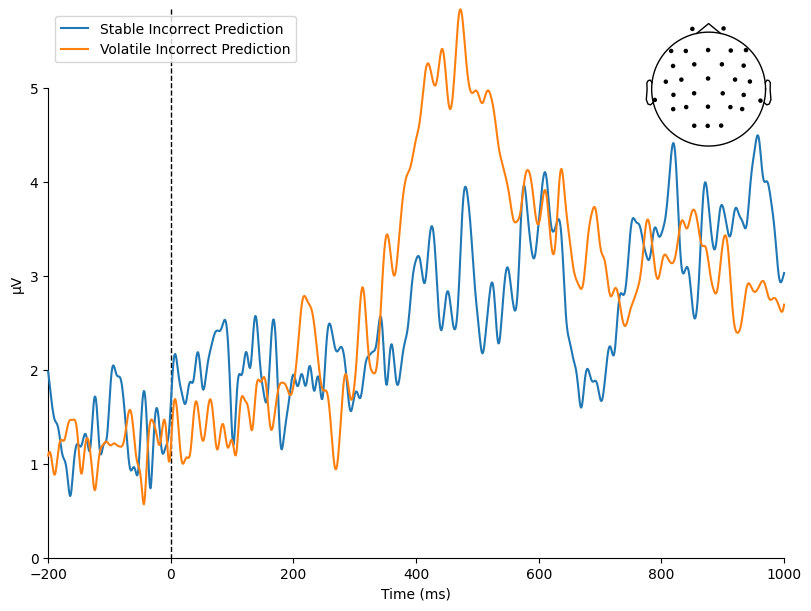

[<Figure size 800x600 with 2 Axes>]

In [41]:
stable_word_incorrect_pred_epochs = epochs_2[stable_incorrect_indices]
volatile_word_incorrect_pred_epochs = epochs_2[volatile_incorrect_indices]

# Compute the evoked responses
evoked_stable_incorrect = stable_word_incorrect_pred_epochs.average()
evoked_volatile_incorrect = volatile_word_incorrect_pred_epochs.average()

# Compare the evoked responses
mne.viz.plot_compare_evokeds({
    'Stable Incorrect Prediction': evoked_stable_incorrect,
    'Volatile Incorrect Prediction': evoked_volatile_incorrect
}, legend='upper left', show_sensors='upper right', time_unit='ms')

In [61]:
evoked_incorrect

Condition,0.06 × Stable/Word/Animal/Incongruent + 0.31 × Stable/Word/Tool/Incongruent + 0.38 × Volatile/Word/Animal/Incongruent + 0.25 × Volatile/Word/Tool/Incongruent
Data kind,average
Timepoints,1201 samples
Channels,32 channels
Number of averaged epochs,16
Time range (secs),-0.2 – 1.0
Baseline (secs),-0.200 – 0.000 s


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


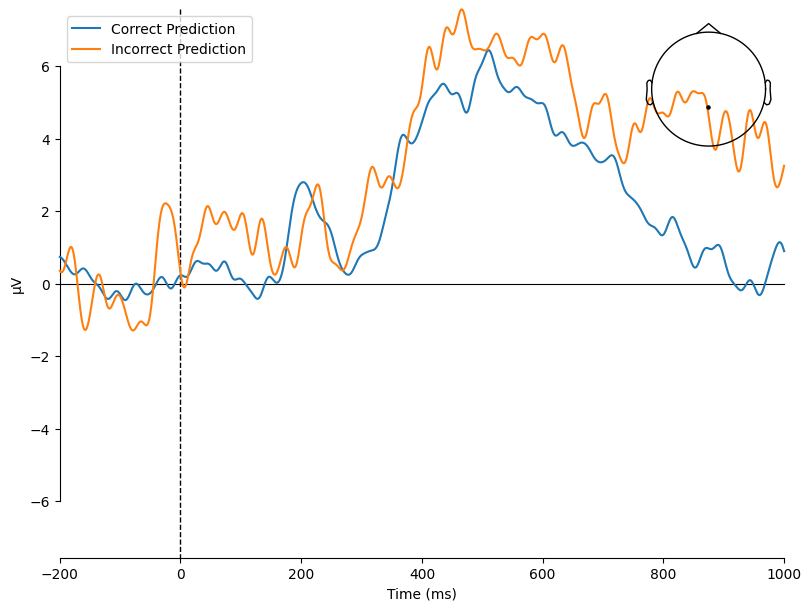

[<Figure size 800x600 with 2 Axes>]

In [39]:
evoked_correct = word_correct_pred_epochs.average()
evoked_incorrect = word_incorrect_pred_epochs.average()

# Compare
#mne.viz.plot_compare_evokeds({'Correct Prediction': evoked_correct, 
#                              'Incorrect Prediction': evoked_incorrect},
#                             legend='upper left', show_sensors='upper right')

evoked_correct_f3 = evoked_correct.copy().pick_channels(['Pz'])
evoked_incorrect_f3 = evoked_incorrect.copy().pick_channels(['Pz'])

mne.viz.plot_compare_evokeds({'Correct Prediction': evoked_correct_f3, 
                              'Incorrect Prediction': evoked_incorrect_f3},
                             legend='upper left', show_sensors='upper right', time_unit='ms')

In [133]:
epochs_2

Number of events,285
Events,Stable/Cue/Animal: 25Stable/Cue/Tool: 22Stable/Pred/Correct: 42Stable/Pred/Incorrect: 6Stable/Word/Animal/Congruent: 16Stable/Word/Animal/Incongruent: 1Stable/Word/Tool/Congruent: 26Stable/Word/Tool/Incongruent: 5Volatile/Cue/Animal: 27Volatile/Cue/Tool: 21Volatile/Pred/Correct: 37Volatile/Pred/Incorrect: 10Volatile/Word/Animal/Congruent: 8Volatile/Word/Animal/Incongruent: 17Volatile/Word/Tool/Congruent: 10Volatile/Word/Tool/Incongruent: 12
Time range,-0.200 – 1.000 s
Baseline,-0.200 – 0.000 s


In [29]:
Cue_evoked

NameError: name 'Cue_evoked' is not defined

In [28]:
mne.viz.plot_compare_evokeds({"Word: Andreas": Cue_evoked})


NameError: name 'Cue_evoked' is not defined

combining channels using "gfp"
combining channels using "gfp"


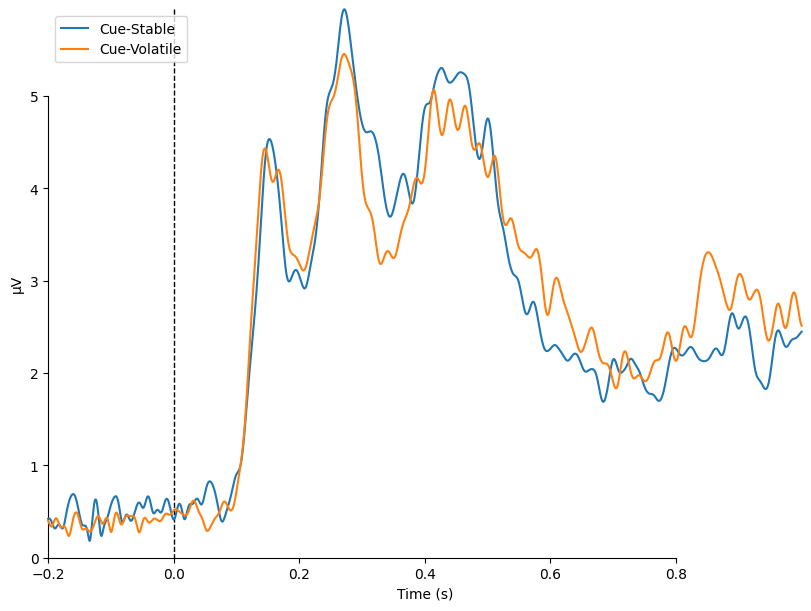

combining channels using "gfp"
combining channels using "gfp"


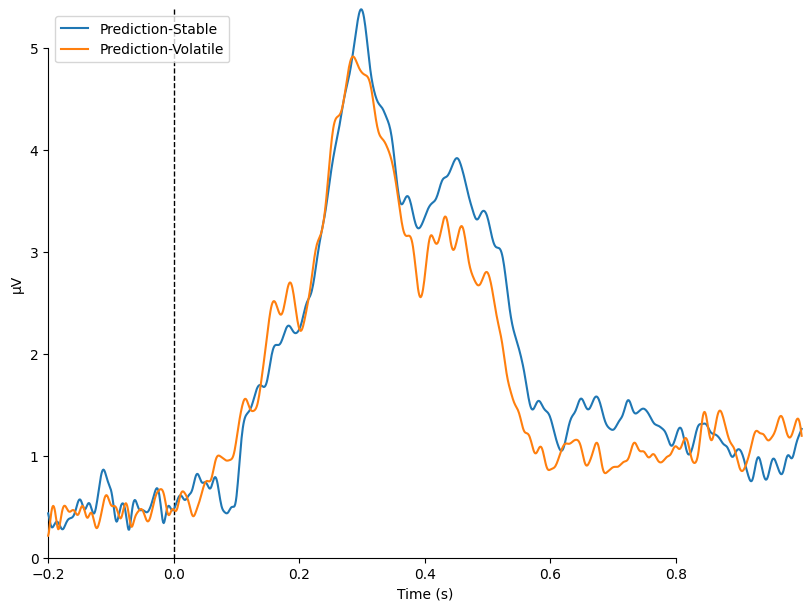

combining channels using "gfp"
combining channels using "gfp"


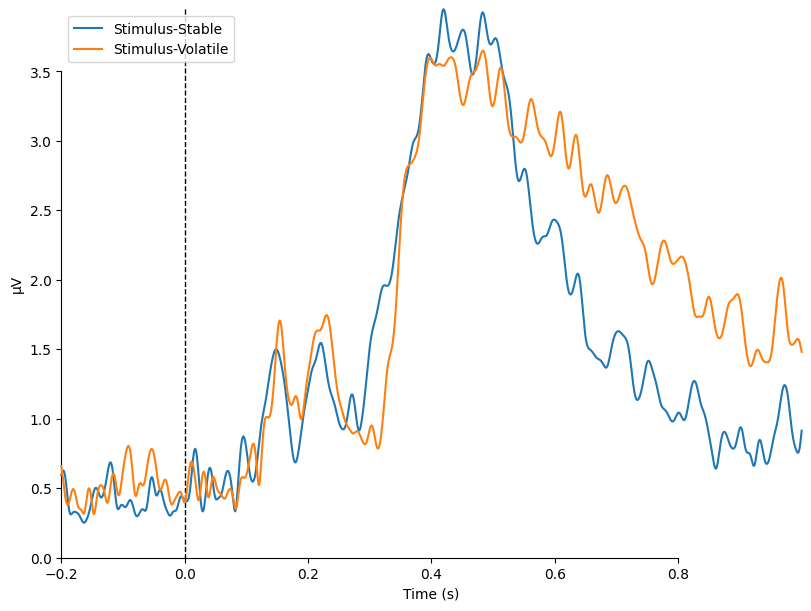

combining channels using "gfp"


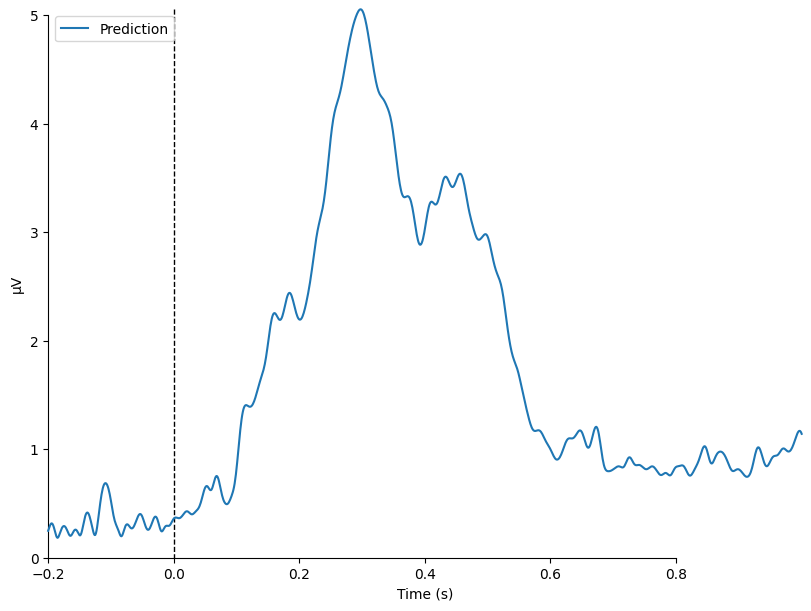

[<Figure size 800x600 with 1 Axes>]

In [30]:
# Cue Stable vs Volatile
Cue_stable = epochs_2["Stable/Cue"]
Cue_stable_evoked = Cue_stable.average()
Cue_volatile = epochs_2["Volatile/Cue"]
Cue_volatile_evoked = Cue_volatile.average()
mne.viz.plot_compare_evokeds({"Cue-Stable": Cue_stable_evoked,"Cue-Volatile": Cue_volatile_evoked})


# Prediction Stable vs Volatile
Prediction_stable = epochs_2["Stable/Pred"]
Prediction_stable_evoked = Prediction_stable.average()
Prediction_volatile = epochs_2["Volatile/Pred"]
Prediction_volatile_evoked = Prediction_volatile.average()
mne.viz.plot_compare_evokeds({"Prediction-Stable": Prediction_stable_evoked,"Prediction-Volatile": Prediction_volatile_evoked})


# Stimulus Stable vs Volatile
Word_stable = epochs_2["Stable/Word"]
Word_stable_evoked = Word_stable.average()
Word_volatile = epochs_2["Volatile/Word"]
Word_volatile_evoked = Word_volatile.average()
mne.viz.plot_compare_evokeds({"Stimulus-Stable": Word_stable_evoked,"Stimulus-Volatile": Word_volatile_evoked})

Prediction = epochs_2["Pred"]
Prediction_evoked = Prediction.average()
mne.viz.plot_compare_evokeds({"Prediction": Prediction_evoked})



In [31]:
Cue = epochs_2["Cue"]
Cue_evoked = Cue.average()

Word = epochs_2["Word"]
Word_evoked = Word.average()

Pred = epochs_2["Pred"]
Pred_evoked = Pred.average()

Pred_stable = epochs_2["Stable/Pred"]
Pred_volatile = epochs_2["Volatile/Pred"]

Pred_stable_evoked = Pred_stable.average()
Pred_volatile_evoked = Pred_volatile.average()

In [137]:
epochs_2["Stable/Pred"]

Number of events,48
Events,Stable/Pred/Correct: 42Stable/Pred/Incorrect: 6
Time range,-0.200 – 1.000 s
Baseline,-0.200 – 0.000 s


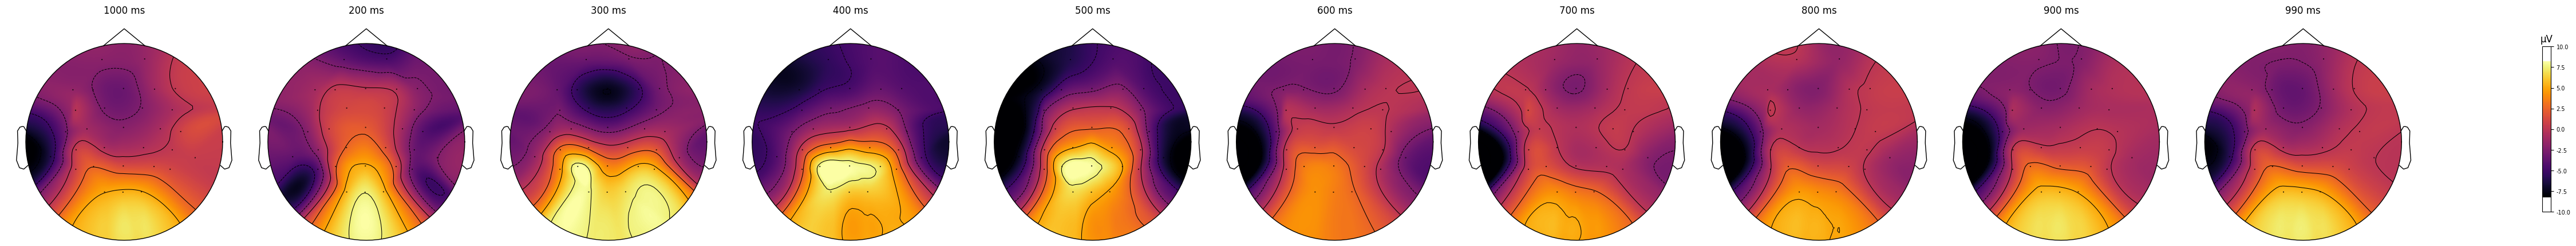

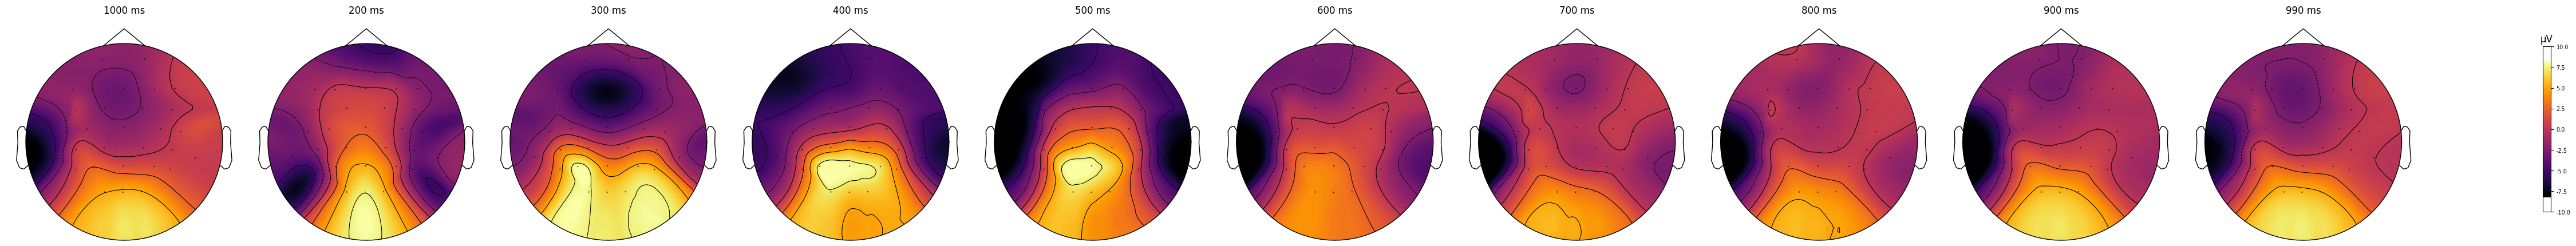

In [40]:
peak_times = [1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99]
Cue_evoked.plot_topomap(times=peak_times, time_unit="ms", ch_type="eeg", extrapolate="head", size=3, cmap="inferno", sphere=(0.0, 0.0, 0.0, 0.12))

#Pred_stable_evoked.plot_topomap(times=peak_times, time_unit="ms", ch_type="eeg", extrapolate="head", size=3, cmap="inferno", sphere=(0.0, 0.0, 0.0, 0.12))
#Pred_volatile_evoked.plot_topomap(times=peak_times, time_unit="ms", ch_type="eeg", extrapolate="head", size=3, cmap="inferno", sphere=(0.0, 0.0, 0.0, 0.12))


#evoked_correct.plot_topomap(times=peak_times, time_unit="ms", ch_type="eeg", extrapolate="head", size=3, cmap="inferno", sphere=(0.0, 0.0, 0.0, 0.12))
#evoked_incorrect.plot_topomap(times=peak_times, time_unit="ms", ch_type="eeg", extrapolate="head", size=3, cmap="inferno", sphere=(0.0, 0.0, 0.0, 0.12))



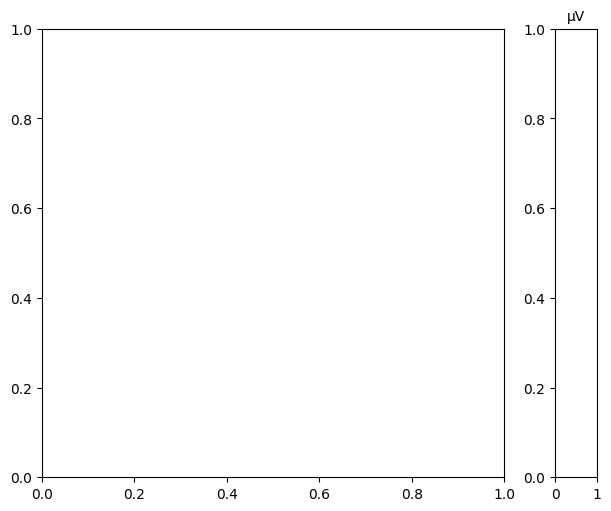

MovieWriter ffmpeg unavailable; using Pillow instead.


Initializing animation...


In [141]:
times = np.linspace(0.1, 1.0, 25)

fig, anim = Word_evoked.animate_topomap(times=times, frame_rate=500, time_unit='ms', blit=False, extrapolate="head",  sphere=(0.0, 0.0, 0.0, 0.12))
for ax in fig.axes:
    for im in ax.get_images():
        im.set_cmap("inferno")

# Save the animation as a GIF
anim.save('ANDREAS_EXTENDED.gif', fps=500)

In [142]:
epochs_2.info['ch_names']

['Fp1',
 'Fp2',
 'F7',
 'F3',
 'Fz',
 'F4',
 'F8',
 'FC5',
 'FC1',
 'FC2',
 'FC6',
 'T7',
 'C3',
 'Cz',
 'C4',
 'T8',
 'TP9',
 'CP5',
 'CP1',
 'CP2',
 'CP6',
 'TP10',
 'P7',
 'P3',
 'Pz',
 'P4',
 'P8',
 'PO9',
 'O1',
 'Oz',
 'O2',
 'PO10']

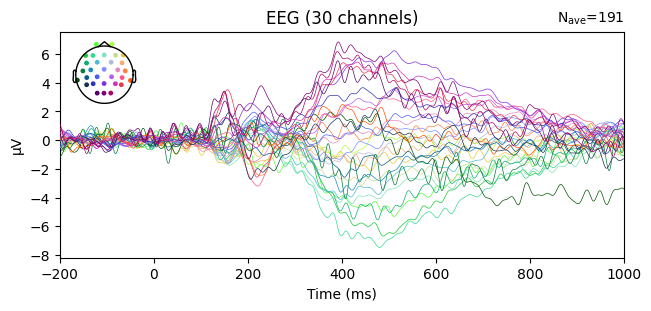

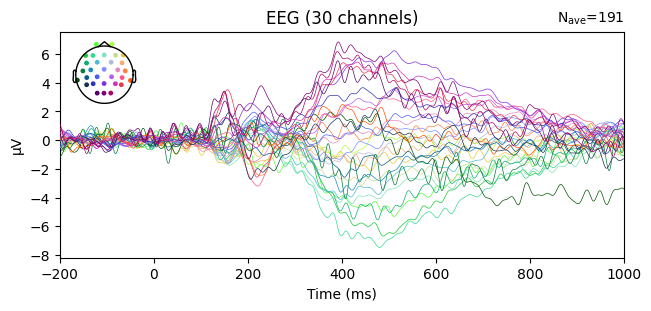

In [35]:
#Word_selected = Word.pick_channels(["Oz"])
#Word_selected_evoked = Word_selected.average()
#evoked_selected = epochs_selected.average()
Word_evoked.plot(time_unit='ms')

#Word_evoked.plot(time_unit='ms')